# **HARTH Dataset**

The Human Activity Recognition Trondheim (HARTH) dataset is a professionally-annotated dataset containing 22 subjects wearing two 3-axial accelerometers for around 2 hours in a free-living setting. The sensors were attached to the right thigh and lower back. The professional recordings and annotations provide a promising benchmark dataset for researchers to develop innovative machine learning approaches for precise HAR in free living.

Dataset Characteristics
Multivariate, Time-Series

Subject Area
Computer Science

Associated Tasks
Classification

Feature Type
Real

**Instances**
6461328

**Features**
8

Dataset Information
For what purpose was the dataset created?

The dataset was created to train machine learning classifiers for human activity recognition based on professional annotations of activities in a free-living setting.

Who funded the creation of the dataset?

NTNU Helse

Additional Information

The HARTH dataset contains recordings of 22 participants wearing two 3-axial Axivity AX3 accelerometers for around 2 hours in a free-living setting. One sensor was attached to the right front thigh and the other to the lower back. The provided sampling rate is 50Hz. Video recordings of a chest-mounted camera were used to annotate the performed activities frame-by-frame.

Each subject's recordings are provided in a separate .csv file. One such .csv file contains the following columns:
1. timestamp: date and time of recorded sample
2. back_x: acceleration of back sensor in x-direction (down) in the unit g
3. back_y: acceleration of back sensor in y-direction (left) in the unit g
4. back_z: acceleration of back sensor in z-direction (forward) in the unit g
5. thigh_x: acceleration of thigh sensor in x-direction (down) in the unit g
6. thigh_y: acceleration of thigh sensor in y-direction (right) in the unit g
7. thigh_z: acceleration of thigh sensor in z-direction (backward) in the unit g
8. label: annotated activity code

The dataset contains the following annotated activities with the corresponding coding:
1: walking
2: running
3: shuffling
4: stairs (ascending)
5: stairs (descending)
6: standing
7: sitting
8: lying
13: cycling (sit)
14: cycling (stand)
130: cycling (sit, inactive)
140: cycling (stand, inactive)

Has Missing Values?: No

### EDA

This codeto loaded dataset files  to work in kaggle

In [ ]:
import pandas as pd
import glob
import os

files = glob.glob('/kaggle/input/harth-har/*')
print("Starting")

column_names = ['timestamp', 'back_x', 'back_y', 'back_z', 'thigh_x', 'thigh_y', 'thigh_z', 'label']
df = pd.DataFrame(columns=column_names)

data_frames = []  # List to hold data frames for concatenation

for file in glob.glob(os.path.join('/kaggle/input/harth-har/', 'S*.csv')):
    subject_id = os.path.basename(file).split('.')[0]
    print(subject_id)
    dft = pd.read_csv(file, sep=",")
    dft['subject'] = subject_id
    data_frames.append(dft)

# Concatenate all data frames
df = pd.concat(data_frames, ignore_index=True)

print("Finished")



Starting
S029
S018
S020
S009
S022
S028
S012
S013
S010
S016
S025
S017
S015
S023
S008
S006
S021
S027
S014
S024
S026
S019
Finished


this to lode it to work in colab

In [ ]:
!wget https://archive.ics.uci.edu/static/public/779/harth.zip

In [ ]:
!unzip harth.zip

In [ ]:
import pandas as pd
import glob
import os

files=glob.glob('/content/harth/*')

column_names = ['timestamp','back_x','back_y','back_z','thigh_x','thigh_y','thigh_z','label']
df=pd.DataFrame(columns = column_names)
for file in glob.glob(os.path.join('/content/harth/', 'S*.csv')):
  subject_id = os.path.basename(file).split('.')[0]
  print(subject_id)
  dft=pd.read_csv(file,sep=",")
  dft['subject']=subject_id
  df=df._append(dft)

In [ ]:
df.drop(labels = ['index', 'Unnamed: 0'], axis = 'columns', inplace = True)
#df['timestamp'] = pd.to_datetime(df['timestamp'])
df.head()

,timestamp,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,label,subject
0,2019-01-12 00:00:00.000,-1.000000,-0.071289,-0.215332,-0.997070,-0.124268,0.142334,6,S029
1,2019-01-12 00:00:00.020,-1.000000,-0.084473,-0.210449,-0.964844,-0.107422,0.160645,6,S029
2,2019-01-12 00:00:00.040,-0.997559,-0.111328,-0.199219,-0.971191,-0.108887,0.170898,6,S029
3,2019-01-12 00:00:00.060,-1.006592,-0.139160,-0.209717,-0.986084,-0.112061,0.154297,6,S029
4,2019-01-12 00:00:00.080,-1.030029,-0.140137,-0.228760,-0.985840,-0.127441,0.155029,6,S029


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Handle missing values (if any)
df = df.dropna()

             back_x        back_y        back_z       thigh_x       thigh_y  \
count  6.461328e+06  6.461328e+06  6.461328e+06  6.461328e+06  6.461328e+06   
mean  -8.849574e-01 -1.326128e-02 -1.693779e-01 -5.948883e-01  2.087665e-02   
std    3.775916e-01  2.311709e-01  3.647385e-01  6.263466e-01  3.884511e-01   
min   -8.000000e+00 -4.307617e+00 -6.574463e+00 -8.000000e+00 -7.997314e+00   
25%   -1.002393e+00 -8.312914e-02 -3.720700e-01 -9.742110e-01 -1.000873e-01   
50%   -9.748998e-01  2.593677e-03 -1.374510e-01 -4.217309e-01  3.262909e-02   
75%   -8.123032e-01  7.251000e-02  4.647321e-02 -1.678755e-01  1.549512e-01   
max    2.291708e+00  6.491943e+00  4.909483e+00  7.999756e+00  7.999756e+00   

            thigh_z         label  
count  6.461328e+06  6.461328e+06  
mean   3.749160e-01  6.783833e+00  
std    7.360983e-01  1.143238e+01  
min   -8.000000e+00  1.000000e+00  
25%   -1.557138e-01  3.000000e+00  
50%    7.004390e-01  7.000000e+00  
75%    9.486747e-01  7.000000e+00  


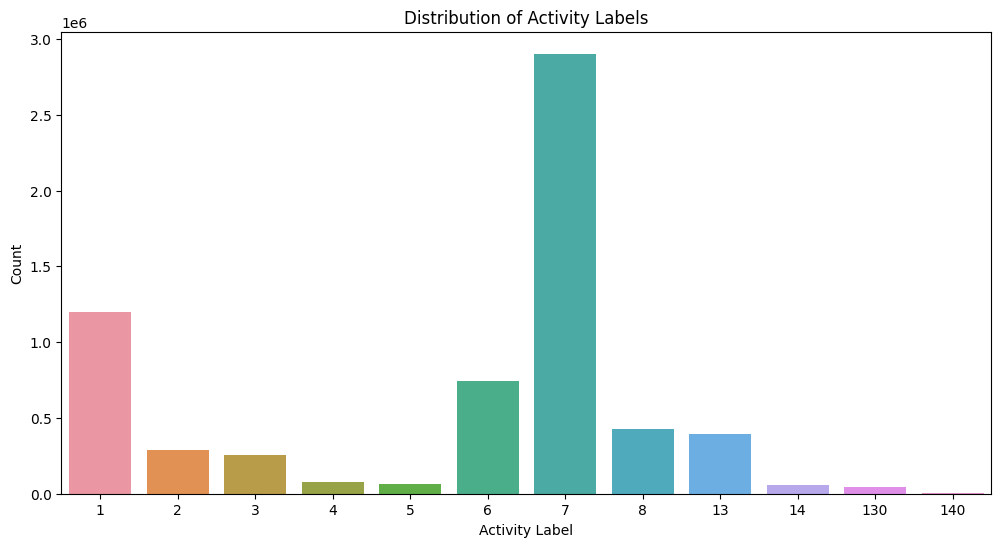

In [ ]:
# Visualize distribution of the labels
plt.figure(figsize=(12, 6))
sns.countplot(x='label', data=df)
plt.title('Distribution of Activity Labels')
plt.xlabel('Activity Label')
plt.ylabel('Count')
plt.show()

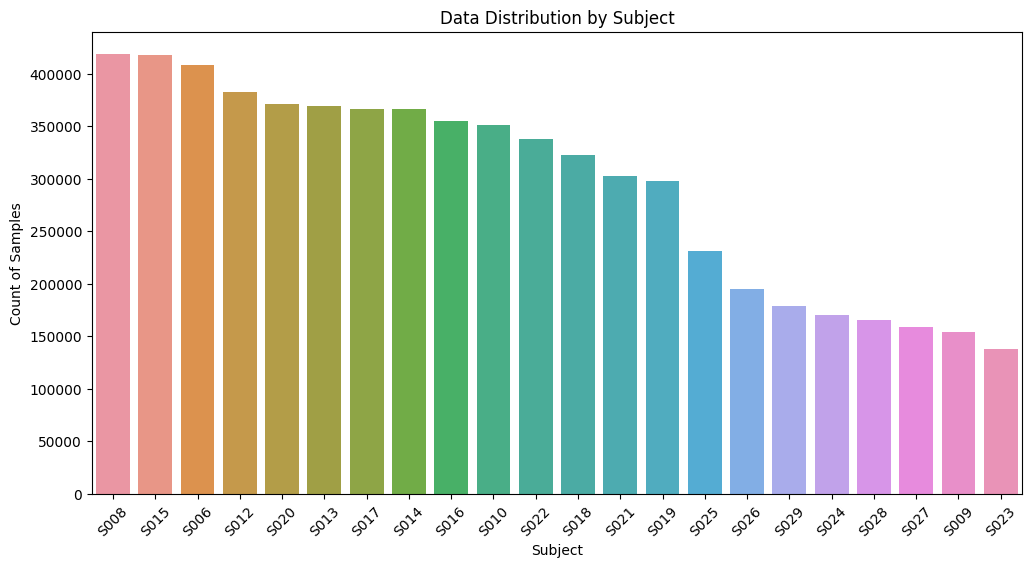

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='subject', data=df, order=df['subject'].value_counts().index)
plt.title('Data Distribution by Subject')
plt.xlabel('Subject')
plt.ylabel('Count of Samples')
plt.xticks(rotation=45)
plt.show()

### Data Preprocessing

#### Denoising

In [ ]:
from scipy.signal import medfilt

# Apply median filter for denoising
for col in ['back_x', 'back_y', 'back_z', 'thigh_x', 'thigh_y', 'thigh_z']:
    df[col] = medfilt(df[col], kernel_size=3)


#### Normalization

In [ ]:
from sklearn.preprocessing import StandardScaler

# Normalize sensor data
scaler = StandardScaler()
df[['back_x', 'back_y', 'back_z', 'thigh_x', 'thigh_y', 'thigh_z']] = scaler.fit_transform(
    df[['back_x', 'back_y', 'back_z', 'thigh_x', 'thigh_y', 'thigh_z']])


#### Segmentation

In [ ]:
window_size = 50
segments = []
labels = []
subjects = []

for i in range(0, len(df) - window_size, window_size):
    window = df.iloc[i:i + window_size]
    segments.append([
        window['back_x'].values,
        window['back_y'].values,
        window['back_z'].values,
        window['thigh_x'].values,
        window['thigh_y'].values,
        window['thigh_z'].values
    ])
    labels.append(window['label'].mode()[0])
    subjects.append(window['subject'].mode()[0])

X_segments = np.array(segments).transpose(0, 2, 1)  # Shape: (num_samples, window_size, num_features)
y_segments = np.array(labels)
subjects_segments = np.array(subjects)

#I combined them to one data frame
# Combine X_segments and y_segments into one DataFrame
num_samples, window_size, num_features = X_segments.shape
X_reshaped = X_segments.reshape(num_samples, window_size * num_features)

# Combine into DataFrame
data_combined = pd.DataFrame(X_reshaped)
data_combined['label'] = y_segments
data_combined['subject'] = subjects_segments

# Show the first few rows of the combined DataFrame
print("Combined DataFrame:")
print(data_combined.head())


Combined DataFrame:
          0         1         2         3         4         5         6  \
0 -0.326677 -0.263945 -0.117564 -0.653971 -0.387509 -0.339896 -0.326677   
1 -0.326677 -0.295061  0.322757 -0.687612 -0.631535 -0.435367 -0.326677   
2 -0.326677 -0.412854 -0.009199 -0.659080 -0.466652 -0.309972 -0.326677   
3 -0.326677 -0.366181 -0.140884 -0.674837 -0.435141 -0.329921 -0.326677   
4 -0.801875 -0.003911  0.651971  1.863591 -0.574376 -2.226152 -0.801875   

          7         8         9  ...       292       293       294       295  \
0 -0.323955 -0.117564 -0.665042  ... -0.572908 -0.460304 -0.326677 -0.295061   
1 -0.295061  0.322757 -0.689314  ... -0.523078 -0.328140 -0.326677 -0.412854   
2 -0.377292 -0.009199 -0.660784  ... -0.492300 -0.331703 -0.326677 -0.366181   
3 -0.366181 -0.140884 -0.674837  ... -0.515016 -2.226152 -0.889450 -0.003911   
4  0.013868  0.801487  1.834208  ... -0.602954 -2.369357 -0.504538 -0.330623   

        296       297       298       299  label

In [ ]:
data_combined.head()

,0,1,2,3,4,5,6,7,8,9,...,292,293,294,295,296,297,298,299,label,subject
0,-0.326677,-0.263945,-0.117564,-0.653971,-0.387509,-0.339896,-0.326677,-0.323955,-0.117564,-0.665042,...,-0.572908,-0.460304,-0.326677,-0.295061,0.320701,-0.689314,-0.621275,-0.435367,6,S029
1,-0.326677,-0.295061,0.322757,-0.687612,-0.631535,-0.435367,-0.326677,-0.295061,0.322757,-0.689314,...,-0.523078,-0.328140,-0.326677,-0.412854,-0.009199,-0.660784,-0.466652,-0.309972,6,S029
2,-0.326677,-0.412854,-0.009199,-0.659080,-0.466652,-0.309972,-0.326677,-0.377292,-0.009199,-0.660784,...,-0.492300,-0.331703,-0.326677,-0.366181,-0.100419,-0.660784,-0.461522,-0.331703,6,S029
3,-0.326677,-0.366181,-0.140884,-0.674837,-0.435141,-0.329921,-0.326677,-0.366181,-0.140884,-0.674837,...,-0.515016,-2.226152,-0.889450,-0.003911,0.451700,1.863591,-0.515016,-2.226152,7,S029
4,-0.801875,-0.003911,0.651971,1.863591,-0.574376,-2.226152,-0.801875,0.013868,0.801487,1.834208,...,-0.602954,-2.369357,-0.504538,-0.330623,0.023038,0.978696,-0.602954,-2.369357,7,S029


In [ ]:
data_combined.shape

(129226, 302)

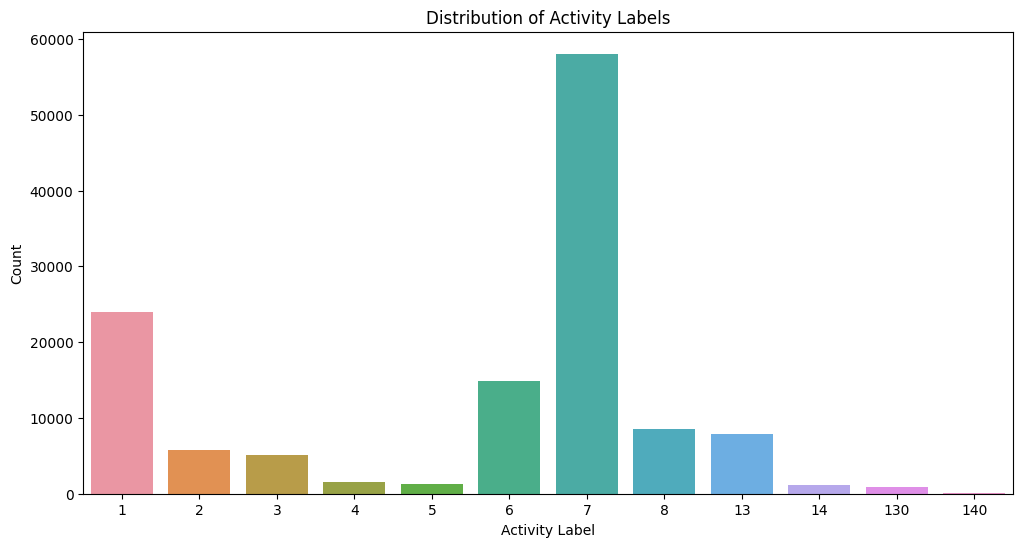

In [ ]:
# Visualize distribution of the labels
plt.figure(figsize=(12, 6))
sns.countplot(x='label', data=data_combined)
plt.title('Distribution of Activity Labels')
plt.xlabel('Activity Label')
plt.ylabel('Count')
plt.show()

#### Balancing the data

In [ ]:
from imblearn.over_sampling import SMOTE
import numpy as np

def balance_data(X, y, subjects):
    X_balanced = []
    y_balanced = []
    subjects_balanced = []

    for subject in np.unique(subjects):
        subject_indices = np.where(subjects == subject)
        X_subject = X[subject_indices]
        y_subject = y[subject_indices]
        subject_subjects = subjects[subject_indices]

        if len(y_subject) < 6:
            print(f"Skipping SMOTE for subject {subject} with insufficient samples: {len(y_subject)}")
            X_balanced.append(X_subject)
            y_balanced.append(y_subject)
            subjects_balanced.append(subject_subjects)
            continue

        n_neighbors = min(len(y_subject) - 1, 5)
        smote = SMOTE(sampling_strategy='minority', k_neighbors=n_neighbors)

        try:
            X_resampled, y_resampled = smote.fit_resample(X_subject.reshape(len(X_subject), -1), y_subject)
            X_resampled = X_resampled.reshape(-1, X_subject.shape[1], X_subject.shape[2])
            X_balanced.append(X_resampled)
            y_balanced.append(y_resampled)
            subjects_balanced.append([subject] * len(y_resampled))
        except ValueError as e:
            print(f"SMOTE failed for subject {subject} with error: {e}")
            X_balanced.append(X_subject)
            y_balanced.append(y_subject)
            subjects_balanced.append(subject_subjects)

    return np.concatenate(X_balanced), np.concatenate(y_balanced), np.concatenate(subjects_balanced)

X_balanced, y_balanced, subjects_balanced = balance_data(X_segments, y_segments, subjects_segments)

print("Data balancing completed")


SMOTE failed for subject S008 with error: Expected n_neighbors <= n_samples,  but n_samples = 3, n_neighbors = 6
SMOTE failed for subject S009 with error: Expected n_neighbors <= n_samples,  but n_samples = 2, n_neighbors = 6
SMOTE failed for subject S013 with error: Expected n_neighbors <= n_samples,  but n_samples = 2, n_neighbors = 6
SMOTE failed for subject S016 with error: Expected n_neighbors <= n_samples,  but n_samples = 5, n_neighbors = 6
SMOTE failed for subject S017 with error: Expected n_neighbors <= n_samples,  but n_samples = 3, n_neighbors = 6
SMOTE failed for subject S018 with error: Expected n_neighbors <= n_samples,  but n_samples = 3, n_neighbors = 6
SMOTE failed for subject S027 with error: Expected n_neighbors <= n_samples,  but n_samples = 2, n_neighbors = 6
Data balancing completed


In [ ]:
# Combine X_segments and y_segments into one DataFrame
num_samples, window_size, num_features = X_balanced.shape
X_reshaped = X_balanced.reshape(num_samples, window_size * num_features)

# Combine into DataFrame
data_combined = pd.DataFrame(X_reshaped)
data_combined['label'] = y_balanced
data_combined['subject'] = subjects_balanced

# Show the first few rows of the combined DataFrame
print("Combined DataFrame:")
print(data_combined.head())

Combined DataFrame:
          0         1         2         3         4         5         6  \
0  0.339995  1.343576  1.372580 -1.038221  0.090837 -0.051025  0.339995   
1 -0.292612  0.376168  0.708174 -0.655131  0.109293 -0.980803 -0.302397   
2 -0.289985  0.366033  0.701149 -0.656268  0.101327 -0.986092 -0.289962   
3 -0.297233  0.349992  0.680654 -0.648089  0.125449 -0.981768 -0.271243   
4 -0.296190  0.107632  0.435968 -0.615803  0.308678 -0.988339 -0.363448   

          7         8         9  ...       292       293       294       295  \
0  1.343576  1.372580  0.967127  ...  0.113083 -0.965007 -0.288011  0.376168   
1  0.352148  0.708174 -0.609442  ...  0.101367 -0.986092 -0.294589  0.392237   
2  0.366033  0.718038 -0.628031  ...  0.116716 -0.984664 -0.296010  0.353243   
3  0.349992  0.679048 -0.637007  ...  0.272873 -1.012446 -0.269483  0.091153   
4  0.255265  0.435968 -0.613055  ...  1.247329 -1.538744 -0.237585  1.158772   

        296       297       298       299  label

Let's Plot the distribution again after balancing

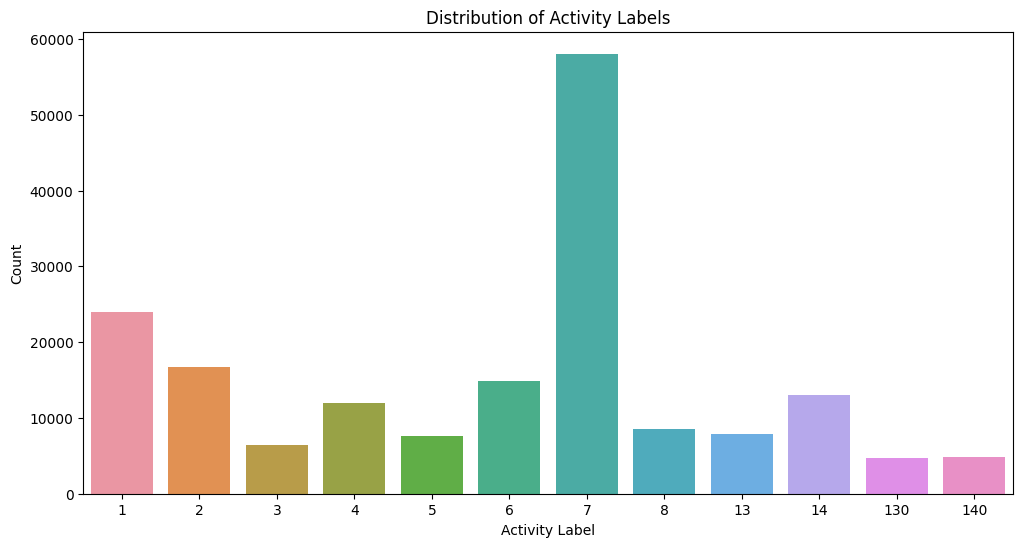

In [ ]:
# Visualize distribution of the labels
plt.figure(figsize=(12, 6))
sns.countplot(x='label', data=data_combined)
plt.title('Distribution of Activity Labels')
plt.xlabel('Activity Label')
plt.ylabel('Count')
plt.show()

We can notice that the distribution become better but not perfect

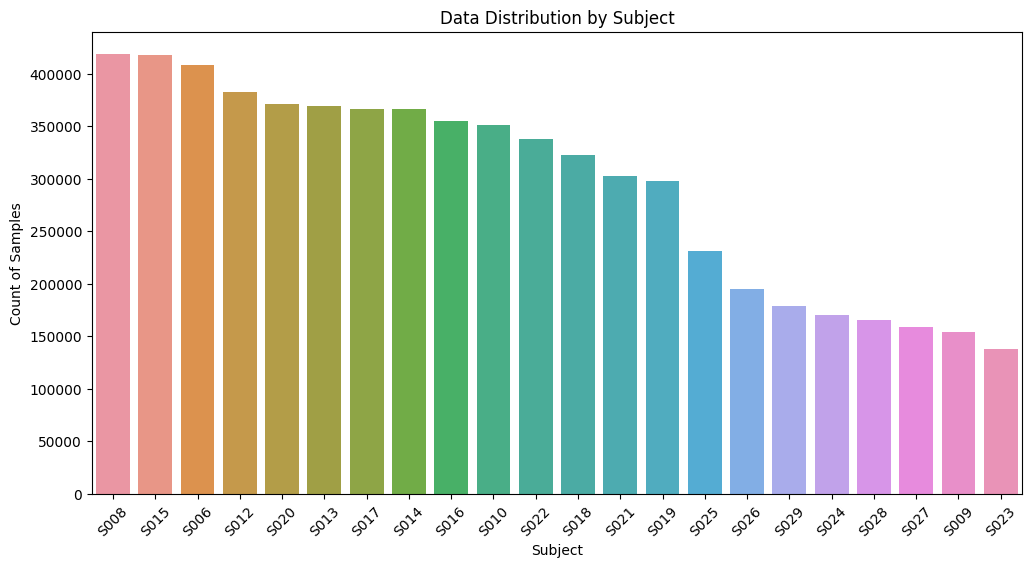

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='subject', data=df, order=df['subject'].value_counts().index)
plt.title('Data Distribution by Subject')
plt.xlabel('Subject')
plt.ylabel('Count of Samples')
plt.xticks(rotation=45)
plt.show()

In [ ]:
data_combined.shape

(178596, 302)

In [ ]:
activities_map={
 1: 'walking',
 2: 'running',
 3: 'shuffling',
 4: 'stairs (ascending)',
 5: 'stairs (descending)',
 6: 'standing',
 7: 'sitting',
 8: 'lying',
 13: 'cycling (sit)',
 14: 'cycling (stand)',
 130: 'cycling (sit, inactive)',
 140: 'cycling (stand, inactive)'
 }

The distribution after balancnig

label    cycling (sit)  cycling (sit, inactive)  cycling (stand)  \
subject                                                            
S006               499                      225               64   
S008               152                        3               15   
S009              2407                      207              215   
S010                 0                        0                0   
S012                 0                        0                0   

label    cycling (stand, inactive)  lying  running  shuffling  sitting  \
subject                                                                  
S006                             0    260        0        251     5062   
S008                            15      0        0        582     5855   
S009                             2      0        0          3        0   
S010                             0      0        0        598      930   
S012                             0    378     6235        143     6235   

labe

<Figure size 1400x800 with 0 Axes>

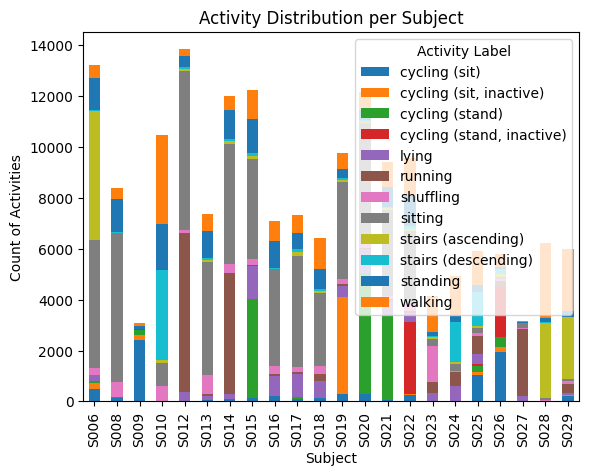

In [ ]:
df1=data_combined.copy()
df1['label'] = df1['label'].astype(int).map(activities_map)
# Group by subject and label and count occurrences
activity_distribution = df1.groupby(['subject', 'label']).size().unstack(fill_value=0)

# Print the distribution to check
print(activity_distribution.head())
import matplotlib.pyplot as plt

# Set the figure size for better readability
plt.figure(figsize=(14, 8))

# Create a stacked bar plot
activity_distribution.plot(kind='bar', stacked=True)
plt.title('Activity Distribution per Subject')
plt.xlabel('Subject')
plt.ylabel('Count of Activities')
plt.legend(title='Activity Label', loc='upper right')

### Handcrafted feature extraction

In [ ]:
from scipy.stats import iqr
from scipy.signal import correlate
from scipy.fft import fft
from math import sqrt


# Handcrafted feature extraction functions
def min_max_diff(ls): return max(ls) - min(ls)
def rms(ls): return sqrt(sum(n * n for n in ls) / len(ls))

def correlation(ls1, ls2):
    if len(ls1) > 1 and len(ls2) > 1:
        if (np.std(ls1) * np.std(ls2)) == 0:
            return 0
        return np.cov(ls1, ls2)[0][1] / (np.std(ls1) * np.std(ls2))
    return 0

def crossed_correlation(ls1, ls2): return max(correlate(ls1, ls2))
def magnitude(ls1, ls2, ls3):
    s = [sqrt(x**2 + y**2 + z**2) for (x, y, z) in zip(ls1, ls2, ls3)]
    return sum(s) / len(s)

# Extract handcrafted features from balanced data
def extract_handcrafted_features(X, y, subjects, window_size=50):
    feature_list = []
    labels = []
    subject_list = []

    for i in range(len(X)):
        segment = X[i]
        label = y[i]
        subject = subjects[i]

        features = {}
        features['label'] = label
        features['subject'] = subject
        for axis_idx, axis in enumerate(['back_x', 'back_y', 'back_z', 'thigh_x', 'thigh_y', 'thigh_z']):
            acc_data = segment[:, axis_idx]

            # Time-domain features
            for func in [min_max_diff, rms, iqr, np.mean, np.std, np.var, np.median]:
                features[f'{axis}_{func.__name__}'] = func(acc_data)

            # Frequency-domain features
            ft = fft(acc_data)
            signal = np.abs(ft**2)/len(acc_data)
            features[f'{axis}_fft_mean'] = np.mean(signal)
            features[f'{axis}_fft_var'] = np.var(signal)

        # Magnitude features
        features['magnitude_back'] = magnitude(segment[:, 0], segment[:, 1], segment[:, 2])
        features['magnitude_thigh'] = magnitude(segment[:, 3], segment[:, 4], segment[:, 5])

        # Correlation features
        for f in [correlation, crossed_correlation]:
            features[f'correlation_back_x_back_y_{f.__name__}'] = f(segment[:, 0], segment[:, 1])
            features[f'correlation_back_y_back_z_{f.__name__}'] = f(segment[:, 1], segment[:, 2])
            features[f'correlation_back_z_back_x_{f.__name__}'] = f(segment[:, 2], segment[:, 0])
            features[f'correlation_thigh_x_thigh_y_{f.__name__}'] = f(segment[:, 3], segment[:, 4])
            features[f'correlation_thigh_y_thigh_z_{f.__name__}'] = f(segment[:, 4], segment[:, 5])
            features[f'correlation_thigh_z_thigh_x_{f.__name__}'] = f(segment[:, 5], segment[:, 3])

        feature_list.append(features)
        labels.append(label)
        subject_list.append(subject)

    features_df = pd.DataFrame(feature_list)
    return features_df

# Apply handcrafted feature extraction
features_handcrafted_df = extract_handcrafted_features(X_balanced, y_balanced, subjects_balanced)
print("Extracted Handcrafted Features DataFrame Shape:", features_handcrafted_df.shape)
print(features_handcrafted_df.head())

Extracted Handcrafted Features DataFrame Shape: (178596, 70)
   label subject  back_x_min_max_diff  back_x_rms  back_x_iqr  back_x_mean  \
0      6    S006             2.244391    0.464147    0.057764    -0.192898   
1      1    S006             0.052375    0.294524    0.009810    -0.294267   
2      1    S006             0.049699    0.300137    0.014942    -0.299867   
3      1    S006             0.089980    0.297024    0.011930    -0.296165   
4      6    S006             1.411158    0.485897    0.249311    -0.366248   

   back_x_std  back_x_var  back_x_median  back_x_fft_mean  ...  \
0    0.422165    0.178223      -0.298111         0.215433  ...   
1    0.012282    0.000151      -0.294033         0.086744  ...   
2    0.012730    0.000162      -0.298138         0.090082  ...   
3    0.022573    0.000510      -0.292778         0.088223  ...   
4    0.319309    0.101958      -0.302049         0.236096  ...   

   correlation_back_z_back_x_correlation  \
0                            

In [ ]:
features_handcrafted_df.head()

,label,subject,back_x_min_max_diff,back_x_rms,back_x_iqr,back_x_mean,back_x_std,back_x_var,back_x_median,back_x_fft_mean,...,correlation_back_z_back_x_correlation,correlation_thigh_x_thigh_y_correlation,correlation_thigh_y_thigh_z_correlation,correlation_thigh_z_thigh_x_correlation,correlation_back_x_back_y_crossed_correlation,correlation_back_y_back_z_crossed_correlation,correlation_back_z_back_x_crossed_correlation,correlation_thigh_x_thigh_y_crossed_correlation,correlation_thigh_y_thigh_z_crossed_correlation,correlation_thigh_z_thigh_x_crossed_correlation
0,6,S006,2.244391,0.464147,0.057764,-0.192898,0.422165,0.178223,-0.298111,0.215433,...,-0.289987,-0.156507,-0.279291,0.162782,1.719555,16.309628,3.443977,2.743510,2.900788,27.956619
1,1,S006,0.052375,0.294524,0.009810,-0.294267,0.012282,0.000151,-0.294033,0.086744,...,-0.366176,-0.195027,0.495882,-0.208922,-0.110815,13.190545,-0.205165,-0.064387,-0.096394,31.461397
2,1,S006,0.049699,0.300137,0.014942,-0.299867,0.012730,0.000162,-0.298138,0.090082,...,0.336710,0.006474,0.445060,0.013772,-0.102435,13.067250,-0.203853,-0.064515,-0.099747,31.453909
3,1,S006,0.089980,0.297024,0.011930,-0.296165,0.022573,0.000510,-0.292778,0.088223,...,-0.149926,0.624169,-0.587890,-0.776097,-0.027094,13.896060,-0.132294,-0.077742,-0.124518,31.204871
4,6,S006,1.411158,0.485897,0.249311,-0.366248,0.319309,0.101958,-0.302049,0.236096,...,0.324132,0.256295,-0.802669,-0.585403,-0.018667,19.751398,-0.103579,-0.210880,-0.395813,35.862656


In [ ]:
#df.to_csv('/kaggle/working/features_handcrafted_df.csv', index=False)

In [ ]:
features_handcrafted_df.shape

(178596, 70)

In [ ]:
features_handcrafted_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178596 entries, 0 to 178595
Data columns (total 70 columns):
 #   Column                                           Non-Null Count   Dtype  
---  ------                                           --------------   -----  
 0   label                                            178596 non-null  int64  
 1   subject                                          178596 non-null  object 
 2   back_x_min_max_diff                              178596 non-null  float64
 3   back_x_rms                                       178596 non-null  float64
 4   back_x_iqr                                       178596 non-null  float64
 5   back_x_mean                                      178596 non-null  float64
 6   back_x_std                                       178596 non-null  float64
 7   back_x_var                                       178596 non-null  float64
 8   back_x_median                                    178596 non-null  float64
 9   back_x_fft_mean

In [ ]:
features_handcrafted_df.describe()

,label,back_x_min_max_diff,back_x_rms,back_x_iqr,back_x_mean,back_x_std,back_x_var,back_x_median,back_x_fft_mean,back_x_fft_var,...,correlation_back_z_back_x_correlation,correlation_thigh_x_thigh_y_correlation,correlation_thigh_y_thigh_z_correlation,correlation_thigh_z_thigh_x_correlation,correlation_back_x_back_y_crossed_correlation,correlation_back_y_back_z_crossed_correlation,correlation_back_z_back_x_crossed_correlation,correlation_thigh_x_thigh_y_crossed_correlation,correlation_thigh_y_thigh_z_crossed_correlation,correlation_thigh_z_thigh_x_crossed_correlation
count,178596.000000,178596.000000,178596.000000,178596.000000,178596.000000,178596.000000,178596.000000,178596.000000,178596.000000,1.785960e+05,...,178596.000000,178596.000000,178596.000000,178596.000000,178596.000000,178596.000000,178596.000000,178596.000000,178596.000000,178596.000000
mean,12.854448,1.607392,0.760504,0.839861,-0.021662,0.485953,0.773723,0.014469,1.149191,1.436456e+02,...,-0.010959,-0.011181,0.010030,-0.053593,15.479284,14.821014,16.411213,19.556776,18.114450,32.533130
std,29.225439,2.245788,0.755531,1.430028,0.612373,0.733195,1.915925,0.636448,2.204386,4.665827e+02,...,0.439019,0.332677,0.337965,0.372538,59.764976,25.236810,40.659157,32.733645,26.301067,27.716806
min,1.000000,0.000000,0.006570,0.000000,-0.886598,0.000000,0.000000,-1.816257,0.000043,7.904688e-09,...,-1.020408,-1.020408,-1.020303,-1.020394,-16.532106,-7.062042,-6.775764,-3.548306,-3.464964,-4.120894
25%,3.000000,0.040728,0.297488,0.010745,-0.315378,0.009917,0.000098,-0.304955,0.088499,2.768959e-01,...,-0.267504,-0.235557,-0.209058,-0.283699,0.010128,0.202680,-0.107711,0.497988,0.759171,15.539563
50%,7.000000,0.561011,0.412967,0.160878,-0.239074,0.139799,0.019544,-0.198733,0.170542,7.600396e-01,...,0.007547,-0.008379,0.014995,-0.037386,4.625954,6.208407,2.724021,7.580122,7.760867,27.493537
75%,7.000000,2.382258,0.909983,1.048713,0.059241,0.669708,0.448509,0.114995,0.828070,8.612933e+00,...,0.285644,0.207347,0.243041,0.182788,11.887604,16.941997,16.919884,21.315919,25.149175,41.202411
max,140.000000,17.718846,4.568590,7.045179,3.107185,4.546180,20.667753,3.102107,20.872015,4.567346e+03,...,1.020408,1.020408,1.020408,1.020408,674.879026,352.210418,414.045768,372.213657,326.857478,477.494404


## Training the Models

### Baseline Mlp model

2024-07-16 23:54:31.454673: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-16 23:54:31.454939: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-16 23:54:31.634024: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5169/5169 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.6929 - loss: 6.4813 - val_accuracy: 0.5553 - val_loss: 2.3396
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Accuracy: 0.5553, Recall: 0.5058, F1 Score: 0.3975


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5320/5320 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.6742 - loss: 8.7948 - val_accuracy: 0.9064 - val_loss: 0.6982
262/262 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy: 0.9064, Recall: 0.4686, F1 Score: 0.3488


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5485/5485 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.6880 - loss: 7.4995 - val_accuracy: 0.6811 - val_loss: 1.1344
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 0.6811, Recall: 0.3804, F1 Score: 0.2795


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5254/5254 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.6746 - loss: 12.0365 - val_accuracy: 0.5685 - val_loss: 0.9738
328/328 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy: 0.5685, Recall: 0.3615, F1 Score: 0.3000


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5149/5149 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.6631 - loss: 8.2344 - val_accuracy: 0.9180 - val_loss: 1.1804
433/433 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Accuracy: 0.9180, Recall: 0.4983, F1 Score: 0.4573


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5351/5351 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.6806 - loss: 10.9155 - val_accuracy: 0.8670 - val_loss: 0.5614
231/231 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy: 0.8670, Recall: 0.5178, F1 Score: 0.5042


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5206/5206 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.6757 - loss: 8.4540 - val_accuracy: 0.7917 - val_loss: 1.0306
376/376 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Accuracy: 0.7917, Recall: 0.4088, F1 Score: 0.3639


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5199/5199 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.6667 - loss: 9.8406 - val_accuracy: 0.9369 - val_loss: 0.2680
383/383 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy: 0.9369, Recall: 0.6032, F1 Score: 0.5958


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5359/5359 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.6676 - loss: 8.3499 - val_accuracy: 0.9101 - val_loss: 0.2503
223/223 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy: 0.9101, Recall: 0.7235, F1 Score: 0.6262


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5352/5352 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.6701 - loss: 9.7274 - val_accuracy: 0.8820 - val_loss: 0.7033
230/230 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy: 0.8820, Recall: 0.4799, F1 Score: 0.4741


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5380/5380 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.6704 - loss: 6.8403 - val_accuracy: 0.8577 - val_loss: 1.3468
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy: 0.8577, Recall: 0.6317, F1 Score: 0.5402


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5276/5276 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.6701 - loss: 7.1386 - val_accuracy: 0.5519 - val_loss: 1.4201
306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy: 0.5519, Recall: 0.5616, F1 Score: 0.5839


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5202/5202 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.6741 - loss: 9.9767 - val_accuracy: 0.8972 - val_loss: 0.4053
380/380 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Accuracy: 0.8972, Recall: 0.6699, F1 Score: 0.6022


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5288/5288 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.6720 - loss: 9.1798 - val_accuracy: 0.8980 - val_loss: 0.4491
294/294 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy: 0.8980, Recall: 0.6587, F1 Score: 0.6317


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5283/5283 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.6766 - loss: 11.9770 - val_accuracy: 0.6134 - val_loss: 2.2368
299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy: 0.6134, Recall: 0.4464, F1 Score: 0.4210


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5452/5452 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.6961 - loss: 8.5975 - val_accuracy: 0.5934 - val_loss: 1.0084
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy: 0.5934, Recall: 0.4394, F1 Score: 0.3653


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5427/5427 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6837 - loss: 7.7517 - val_accuracy: 0.5663 - val_loss: 1.3381
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy: 0.5663, Recall: 0.3974, F1 Score: 0.3600


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5397/5397 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.6883 - loss: 6.7022 - val_accuracy: 0.4993 - val_loss: 1.3532
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy: 0.4993, Recall: 0.4356, F1 Score: 0.4004


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5400/5400 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.6865 - loss: 8.1891 - val_accuracy: 0.4683 - val_loss: 2.8517
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy: 0.4683, Recall: 0.4655, F1 Score: 0.2810


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5482/5482 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6705 - loss: 8.2265 - val_accuracy: 0.9836 - val_loss: 0.0655
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy: 0.9836, Recall: 0.5502, F1 Score: 0.5465


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5387/5387 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6740 - loss: 9.4377 - val_accuracy: 0.5432 - val_loss: 0.8949
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy: 0.5432, Recall: 0.5494, F1 Score: 0.4573


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5394/5394 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.7044 - loss: 6.5390 - val_accuracy: 0.7702 - val_loss: 0.7075
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy: 0.7702, Recall: 0.5265, F1 Score: 0.4557
Overall Accuracy: 0.7391
Overall Recall: 0.5127
Overall F1 Score: 0.4542


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


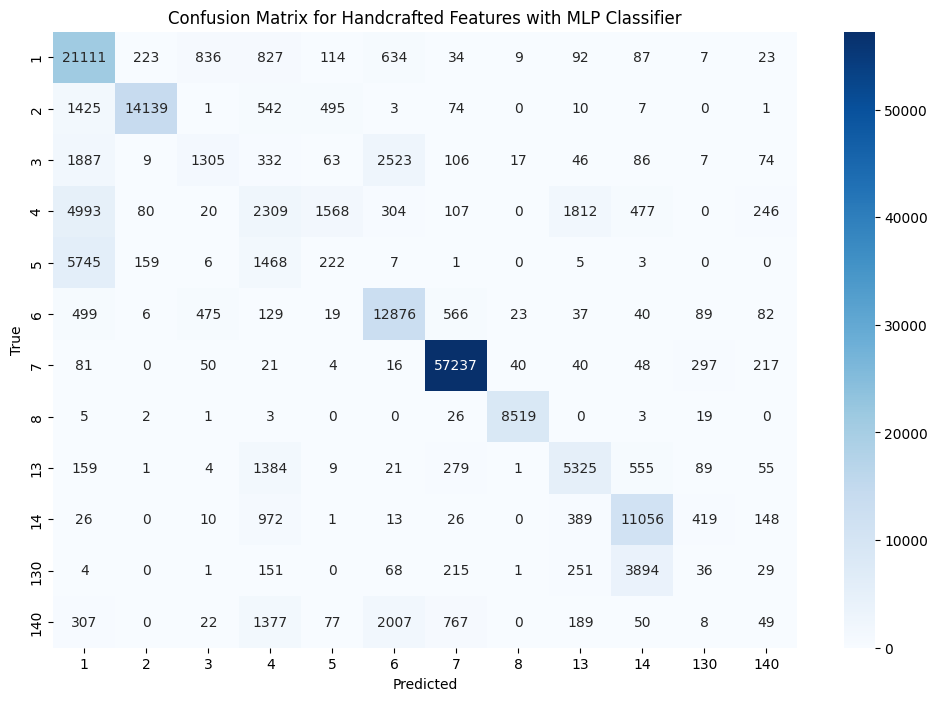

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_42 (Dense)                │ (None, 100)            │         6,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 12)             │         1,212 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,338 (95.07 KB)

 Trainable params: 8,112 (31.69 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 16,226 (63.39 KB)

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data for modeling
X_handcrafted = features_handcrafted_df.drop(columns=['label', 'subject']).values
y_handcrafted = features_handcrafted_df['label'].values
subjects_handcrafted = features_handcrafted_df['subject'].values

# Ensure y_handcrafted contains only valid class indices
unique_classes = np.unique(y_handcrafted)
class_to_index = {cls: idx for idx, cls in enumerate(unique_classes)}
y_handcrafted = np.array([class_to_index[cls] for cls in y_handcrafted])
num_classes = len(unique_classes)

# One-hot encode labels
y_handcrafted = tf.keras.utils.to_categorical(y_handcrafted, num_classes=num_classes)

# Function to create MLP model
def create_mlp_model(input_shape, num_classes):
    model = Sequential()
    model.add(Dense(100, activation='relu', input_shape=input_shape))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Leave-One-Group-Out (LOGO) evaluation
logo = LeaveOneGroupOut()
accuracies_baseline = []
recalls_baseline = []
f1_scores_baseline = []
all_y_true_baseline = []
all_y_pred_baseline = []

for train_idx, test_idx in logo.split(X_handcrafted, y_handcrafted, groups=subjects_handcrafted):
    X_train, X_test = X_handcrafted[train_idx], X_handcrafted[test_idx]
    y_train, y_test = y_handcrafted[train_idx], y_handcrafted[test_idx]

    model = create_mlp_model((X_train.shape[1],), num_classes)
    history = model.fit(X_train, y_train, epochs=1, batch_size=32, verbose=1, validation_data=(X_test, y_test))

    y_test_pred = np.argmax(model.predict(X_test), axis=1)
    y_test_true = np.argmax(y_test, axis=1)

    accuracy = accuracy_score(y_test_true, y_test_pred)
    recall = recall_score(y_test_true, y_test_pred, average='macro')
    f1 = f1_score(y_test_true, y_test_pred, average='macro')
    accuracies_baseline.append(accuracy)
    recalls_baseline.append(recall)
    f1_scores_baseline.append(f1)
    all_y_true_baseline.extend(y_test_true)
    all_y_pred_baseline.extend(y_test_pred)

    print(f'Accuracy: {accuracy:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}')

print(f'Overall Accuracy: {np.mean(accuracies_baseline):.4f}')
print(f'Overall Recall: {np.mean(recalls_baseline):.4f}')
print(f'Overall F1 Score: {np.mean(f1_scores_baseline):.4f}')

# Plot confusion matrix
conf_matrix = confusion_matrix(all_y_true_baseline, all_y_pred_baseline)
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=unique_classes, yticklabels=unique_classes)
plt.title('Confusion Matrix for Handcrafted Features with MLP Classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Plot model architecture
model.summary()


### Conv1D model

for the epochs I use few number of epochs because the data set is large and I have computational environments very limited. Even that I got a good performance.

### Conv1D model

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5169/5169 ━━━━━━━━━━━━━━━━━━━━ 40s 7ms/step - accuracy: 0.8508 - loss: 0.5308
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Accuracy: 0.7632, Recall: 0.6180, F1 Score: 0.5415


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5320/5320 ━━━━━━━━━━━━━━━━━━━━ 43s 8ms/step - accuracy: 0.8507 - loss: 0.5132
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Accuracy: 0.9092, Recall: 0.4850, F1 Score: 0.3941


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5485/5485 ━━━━━━━━━━━━━━━━━━━━ 45s 8ms/step - accuracy: 0.8561 - loss: 0.5080
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Accuracy: 0.8469, Recall: 0.4523, F1 Score: 0.3219


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5254/5254 ━━━━━━━━━━━━━━━━━━━━ 43s 8ms/step - accuracy: 0.8542 - loss: 0.5181
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Accuracy: 0.7641, Recall: 0.4648, F1 Score: 0.4693


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5149/5149 ━━━━━━━━━━━━━━━━━━━━ 45s 8ms/step - accuracy: 0.8459 - loss: 0.5342
433/433 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
Accuracy: 0.9074, Recall: 0.6395, F1 Score: 0.5531


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5351/5351 ━━━━━━━━━━━━━━━━━━━━ 43s 8ms/step - accuracy: 0.8566 - loss: 0.4956
231/231 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Accuracy: 0.8583, Recall: 0.5799, F1 Score: 0.5658


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5206/5206 ━━━━━━━━━━━━━━━━━━━━ 41s 8ms/step - accuracy: 0.8545 - loss: 0.5174
376/376 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Accuracy: 0.8103, Recall: 0.5433, F1 Score: 0.4539


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5199/5199 ━━━━━━━━━━━━━━━━━━━━ 41s 8ms/step - accuracy: 0.8451 - loss: 0.5406
383/383 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Accuracy: 0.9402, Recall: 0.6957, F1 Score: 0.6717


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5359/5359 ━━━━━━━━━━━━━━━━━━━━ 42s 8ms/step - accuracy: 0.8533 - loss: 0.5108
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Accuracy: 0.9356, Recall: 0.7203, F1 Score: 0.6717


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5352/5352 ━━━━━━━━━━━━━━━━━━━━ 42s 7ms/step - accuracy: 0.8478 - loss: 0.5323
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Accuracy: 0.8801, Recall: 0.4971, F1 Score: 0.5074


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5380/5380 ━━━━━━━━━━━━━━━━━━━━ 42s 8ms/step - accuracy: 0.8475 - loss: 0.5351
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Accuracy: 0.8599, Recall: 0.7330, F1 Score: 0.6487


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5276/5276 ━━━━━━━━━━━━━━━━━━━━ 43s 8ms/step - accuracy: 0.8418 - loss: 0.5490
306/306 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Accuracy: 0.5820, Recall: 0.6483, F1 Score: 0.5853


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5202/5202 ━━━━━━━━━━━━━━━━━━━━ 42s 8ms/step - accuracy: 0.8494 - loss: 0.5331
380/380 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Accuracy: 0.9081, Recall: 0.8159, F1 Score: 0.7592


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5288/5288 ━━━━━━━━━━━━━━━━━━━━ 42s 8ms/step - accuracy: 0.8490 - loss: 0.5218
294/294 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Accuracy: 0.9085, Recall: 0.5587, F1 Score: 0.5555


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5283/5283 ━━━━━━━━━━━━━━━━━━━━ 42s 8ms/step - accuracy: 0.8429 - loss: 0.5419
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Accuracy: 0.6276, Recall: 0.5522, F1 Score: 0.4866


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5452/5452 ━━━━━━━━━━━━━━━━━━━━ 44s 8ms/step - accuracy: 0.8556 - loss: 0.5139
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Accuracy: 0.6742, Recall: 0.7692, F1 Score: 0.6382


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5427/5427 ━━━━━━━━━━━━━━━━━━━━ 43s 8ms/step - accuracy: 0.8555 - loss: 0.5066
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Accuracy: 0.8877, Recall: 0.5337, F1 Score: 0.5226


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5397/5397 ━━━━━━━━━━━━━━━━━━━━ 42s 8ms/step - accuracy: 0.8614 - loss: 0.4915
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Accuracy: 0.7803, Recall: 0.5983, F1 Score: 0.6042


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5400/5400 ━━━━━━━━━━━━━━━━━━━━ 42s 8ms/step - accuracy: 0.8543 - loss: 0.5017
182/182 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Accuracy: 0.5604, Recall: 0.6393, F1 Score: 0.5685


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5482/5482 ━━━━━━━━━━━━━━━━━━━━ 43s 8ms/step - accuracy: 0.8496 - loss: 0.5307
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Accuracy: 0.9852, Recall: 0.4935, F1 Score: 0.4950


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5387/5387 ━━━━━━━━━━━━━━━━━━━━ 42s 8ms/step - accuracy: 0.8534 - loss: 0.5151
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Accuracy: 0.8205, Recall: 0.6445, F1 Score: 0.6196


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5394/5394 ━━━━━━━━━━━━━━━━━━━━ 43s 8ms/step - accuracy: 0.8500 - loss: 0.5269
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Accuracy: 0.8720, Recall: 0.6086, F1 Score: 0.5907
Overall Accuracy: 0.8219
Overall Recall: 0.6041
Overall F1 Score: 0.5557


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


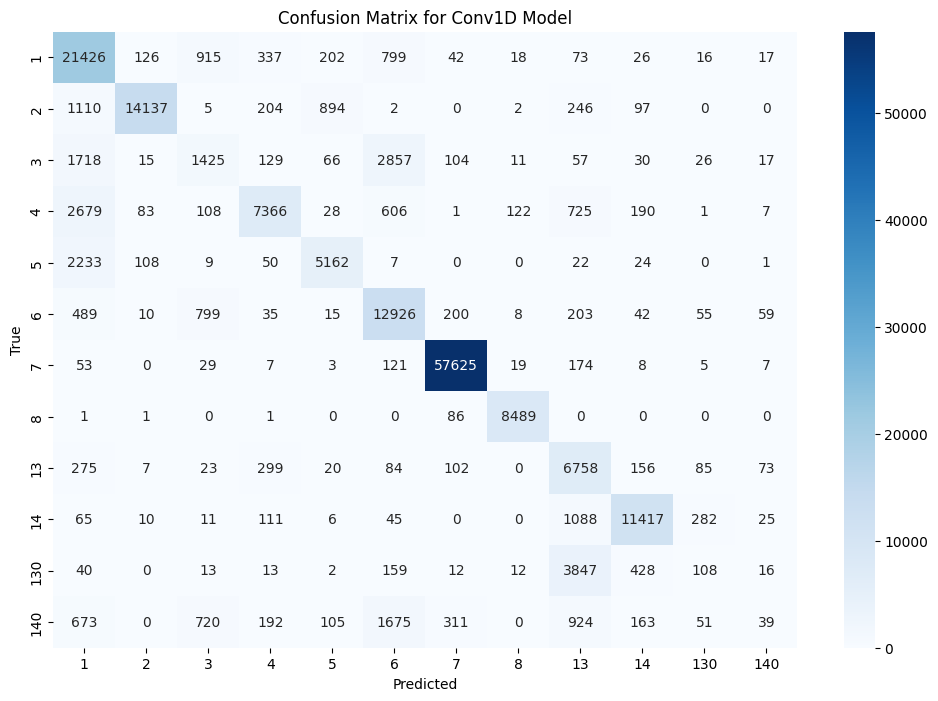

Model: "sequential_43"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_42 (Conv1D)              │ (None, 48, 64)         │         1,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_42 (MaxPooling1D) │ (None, 24, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_43 (Conv1D)              │ (None, 22, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_43 (MaxPooling1D) │ (None, 11, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_21 (Flatten)            │ (None, 1408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_86 (Dense)                │ (None, 128)            │       180,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_43 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_87 (Dense)                │ (None, 141)            │        18,189 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 673,385 (2.57 MB)

 Trainable params: 224,461 (876.80 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 448,924 (1.71 MB)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Prepare data for Conv1D
X_balanced = X_balanced.reshape(X_balanced.shape[0], X_balanced.shape[1], X_balanced.shape[2], 1)

# Function to create Conv1D model
def create_conv1d_model(input_shape, num_classes):
    model = Sequential()
    model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(128, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Leave-One-Subject-Out (LOSO) evaluation
logo = LeaveOneGroupOut()
accuracies_conv1d = []
recalls_conv1d = []
f1_scores_conv1d = []
all_y_true_conv1d = []
all_y_pred_conv1d = []

# Determine number of classes correctly
num_classes = int(np.max(y_balanced)) + 1

for train_idx, test_idx in logo.split(X_balanced, y_balanced, groups=subjects_balanced):
    X_train, X_test = X_balanced[train_idx], X_balanced[test_idx]
    y_train, y_test = y_balanced[train_idx], y_balanced[test_idx]

    # Convert labels to categorical
    y_train = tf.keras.utils.to_categorical(y_train, num_classes=num_classes)
    y_test = tf.keras.utils.to_categorical(y_test, num_classes=num_classes)

    model = create_conv1d_model((X_train.shape[1], X_train.shape[2]), num_classes)
    model.fit(X_train, y_train, epochs=1, batch_size=32, verbose=1)

    y_test_pred = np.argmax(model.predict(X_test), axis=1)
    y_test_true = np.argmax(y_test, axis=1)

    accuracy = accuracy_score(y_test_true, y_test_pred)
    recall = recall_score(y_test_true, y_test_pred, average='macro')
    f1 = f1_score(y_test_true, y_test_pred, average='macro')
    accuracies_conv1d.append(accuracy)
    recalls_conv1d.append(recall)
    f1_scores_conv1d.append(f1)
    all_y_true_conv1d.extend(y_test_true)
    all_y_pred_conv1d.extend(y_test_pred)

    print(f'Accuracy: {accuracy:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}')

print(f'Overall Accuracy: {np.mean(accuracies_conv1d):.4f}')
print(f'Overall Recall: {np.mean(recalls_conv1d):.4f}')
print(f'Overall F1 Score: {np.mean(f1_scores_conv1d):.4f}')

# Plot confusion matrix
conf_matrix = confusion_matrix(all_y_true_conv1d, all_y_pred_conv1d)
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_balanced), yticklabels=np.unique(y_balanced))
plt.title('Confusion Matrix for Conv1D Model')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
# Plot model architecture
model.summary()

### LSTM model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Prepare data for LSTM
X_balanced = X_balanced.reshape(X_balanced.shape[0], X_balanced.shape[1], X_balanced.shape[2])

# Function to create LSTM model
def create_lstm_model(input_shape, num_classes):
    model = Sequential()
    model.add(LSTM(64, input_shape=input_shape, return_sequences=True))
    model.add(Dropout(0.5))
    model.add(LSTM(64))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Leave-One-Subject-Out (LOSO) evaluation
logo = LeaveOneGroupOut()
accuracies_lstm = []
recalls_lstm = []
f1_scores_lstm = []
all_y_true_lstm = []
all_y_pred_lstm = []

# Determine number of classes correctly
num_classes = int(np.max(y_balanced)) + 1

for train_idx, test_idx in logo.split(X_balanced, y_balanced, groups=subjects_balanced):
    X_train, X_test = X_balanced[train_idx], X_balanced[test_idx]
    y_train, y_test = y_balanced[train_idx], y_balanced[test_idx]

    # Convert labels to categorical
    y_train = tf.keras.utils.to_categorical(y_train, num_classes=num_classes)
    y_test = tf.keras.utils.to_categorical(y_test, num_classes=num_classes)

    model = create_lstm_model((X_train.shape[1], X_train.shape[2]), num_classes)
    model.fit(X_train, y_train, epochs=1, batch_size=32, verbose=1)

    y_test_pred = np.argmax(model.predict(X_test), axis=1)
    y_test_true = np.argmax(y_test, axis=1)

    accuracy = accuracy_score(y_test_true, y_test_pred)
    recall = recall_score(y_test_true, y_test_pred, average='macro')
    f1 = f1_score(y_test_true, y_test_pred, average='macro')
    accuracies_lstm.append(accuracy)
    recalls_lstm.append(recall)
    f1_scores_lstm.append(f1)
    all_y_true_lstm.extend(y_test_true)
    all_y_pred_lstm.extend(y_test_pred)

    print(f'Accuracy: {accuracy:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}')

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5169/5169 ━━━━━━━━━━━━━━━━━━━━ 212s 40ms/step - accuracy: 0.7537 - loss: 0.8980
413/413 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step
Accuracy: 0.6579, Recall: 0.5352, F1 Score: 0.3974


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5320/5320 ━━━━━━━━━━━━━━━━━━━━ 219s 41ms/step - accuracy: 0.7308 - loss: 0.9365
262/262 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step
Accuracy: 0.9004, Recall: 0.4335, F1 Score: 0.3591


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5485/5485 ━━━━━━━━━━━━━━━━━━━━ 225s 40ms/step - accuracy: 0.7377 - loss: 0.9205
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.8436, Recall: 0.3806, F1 Score: 0.2764


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5254/5254 ━━━━━━━━━━━━━━━━━━━━ 219s 41ms/step - accuracy: 0.7772 - loss: 0.8119
328/328 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step
Accuracy: 0.8035, Recall: 0.3991, F1 Score: 0.4061


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5149/5149 ━━━━━━━━━━━━━━━━━━━━ 211s 40ms/step - accuracy: 0.6879 - loss: 1.0600
433/433 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step
Accuracy: 0.9419, Recall: 0.5095, F1 Score: 0.4550


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5351/5351 ━━━━━━━━━━━━━━━━━━━━ 218s 40ms/step - accuracy: 0.7210 - loss: 0.9771
231/231 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step
Accuracy: 0.8644, Recall: 0.5572, F1 Score: 0.5431


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5206/5206 ━━━━━━━━━━━━━━━━━━━━ 217s 41ms/step - accuracy: 0.7552 - loss: 0.8739
376/376 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step
Accuracy: 0.8482, Recall: 0.4896, F1 Score: 0.4438


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5199/5199 ━━━━━━━━━━━━━━━━━━━━ 217s 41ms/step - accuracy: 0.7280 - loss: 0.9440
383/383 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step
Accuracy: 0.8940, Recall: 0.6783, F1 Score: 0.6082


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5359/5359 ━━━━━━━━━━━━━━━━━━━━ 220s 40ms/step - accuracy: 0.7569 - loss: 0.8749
223/223 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step
Accuracy: 0.8944, Recall: 0.6771, F1 Score: 0.6580


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5352/5352 ━━━━━━━━━━━━━━━━━━━━ 204s 38ms/step - accuracy: 0.7250 - loss: 0.9472
230/230 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step
Accuracy: 0.8682, Recall: 0.4954, F1 Score: 0.4947


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5380/5380 ━━━━━━━━━━━━━━━━━━━━ 222s 41ms/step - accuracy: 0.7441 - loss: 0.8970
202/202 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.8644, Recall: 0.5774, F1 Score: 0.5772


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5276/5276 ━━━━━━━━━━━━━━━━━━━━ 220s 41ms/step - accuracy: 0.7514 - loss: 0.8917
306/306 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step
Accuracy: 0.5563, Recall: 0.6285, F1 Score: 0.5595


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5202/5202 ━━━━━━━━━━━━━━━━━━━━ 217s 41ms/step - accuracy: 0.7448 - loss: 0.9000
380/380 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step
Accuracy: 0.9590, Recall: 0.7456, F1 Score: 0.6880


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5288/5288 ━━━━━━━━━━━━━━━━━━━━ 224s 42ms/step - accuracy: 0.7549 - loss: 0.8895
294/294 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step
Accuracy: 0.9142, Recall: 0.6578, F1 Score: 0.6457


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5283/5283 ━━━━━━━━━━━━━━━━━━━━ 222s 41ms/step - accuracy: 0.7529 - loss: 0.8785
299/299 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step
Accuracy: 0.6001, Recall: 0.5411, F1 Score: 0.4494


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5452/5452 ━━━━━━━━━━━━━━━━━━━━ 230s 41ms/step - accuracy: 0.7434 - loss: 0.9023
130/130 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.5675, Recall: 0.6214, F1 Score: 0.4671


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5427/5427 ━━━━━━━━━━━━━━━━━━━━ 226s 41ms/step - accuracy: 0.7383 - loss: 0.9248
155/155 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step
Accuracy: 0.7735, Recall: 0.4907, F1 Score: 0.4840


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5397/5397 ━━━━━━━━━━━━━━━━━━━━ 225s 41ms/step - accuracy: 0.7383 - loss: 0.9317
185/185 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step
Accuracy: 0.7277, Recall: 0.6271, F1 Score: 0.5923


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5400/5400 ━━━━━━━━━━━━━━━━━━━━ 223s 41ms/step - accuracy: 0.7403 - loss: 0.9002
182/182 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step
Accuracy: 0.5179, Recall: 0.5839, F1 Score: 0.4993


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5482/5482 ━━━━━━━━━━━━━━━━━━━━ 210s 38ms/step - accuracy: 0.7313 - loss: 0.9317
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step
Accuracy: 0.9808, Recall: 0.4754, F1 Score: 0.4743


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5387/5387 ━━━━━━━━━━━━━━━━━━━━ 228s 42ms/step - accuracy: 0.7343 - loss: 0.9324
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step
Accuracy: 0.6326, Recall: 0.5548, F1 Score: 0.4267


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5394/5394 ━━━━━━━━━━━━━━━━━━━━ 228s 42ms/step - accuracy: 0.7564 - loss: 0.8773
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step
Accuracy: 0.9353, Recall: 0.6116, F1 Score: 0.6167


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Overall Accuracy: 0.7975
Overall Recall: 0.5578
Overall F1 Score: 0.5056


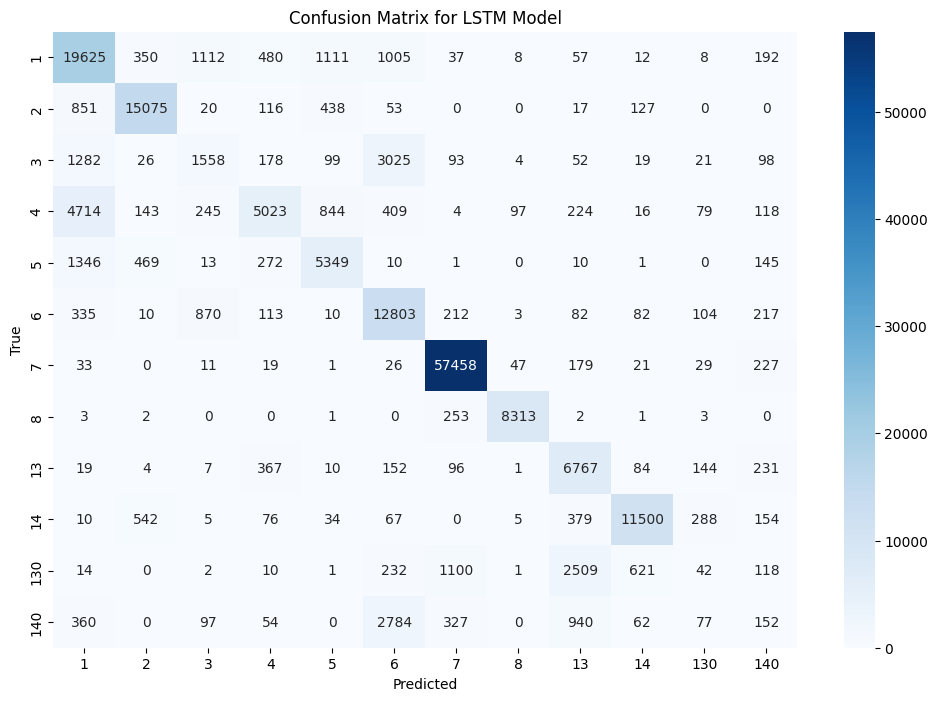

Model: "sequential_65"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_42 (LSTM)                  │ (None, 50, 64)         │        18,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_86 (Dropout)            │ (None, 50, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_43 (LSTM)                  │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_87 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_109 (Dense)               │ (None, 141)            │         9,165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 181,097 (707.41 KB)

 Trainable params: 60,365 (235.80 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 120,732 (471.61 KB)

In [ ]:
print(f'Overall Accuracy: {np.mean(accuracies_lstm):.4f}')
print(f'Overall Recall: {np.mean(recalls_lstm):.4f}')
print(f'Overall F1 Score: {np.mean(f1_scores_lstm):.4f}')

# Plot confusion matrix
conf_matrix = confusion_matrix(all_y_true_lstm, all_y_pred_lstm)
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_balanced), yticklabels=np.unique(y_balanced))
plt.title('Confusion Matrix for LSTM Model')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
# Plot model architecture
model.summary()

### Combined Conv1D and LSTM model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Flatten, Dense, Dropout
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Prepare data for Conv1D and LSTM
X_balanced = X_balanced.reshape(X_balanced.shape[0], X_balanced.shape[1], X_balanced.shape[2])

# Function to create combined Conv1D and LSTM model
def create_combined_model(input_shape, num_classes):
    model = Sequential()
    model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(128, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(LSTM(64, return_sequences=True))
    model.add(Dropout(0.5))
    model.add(LSTM(64))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Leave-One-Subject-Out (LOSO) evaluation
logo = LeaveOneGroupOut()
accuracies_combined = []
recalls_combined = []
f1_scores_combined = []
all_y_true_combined = []
all_y_pred_combined = []

# Determine number of classes correctly
num_classes = int(np.max(y_balanced)) + 1

for train_idx, test_idx in logo.split(X_balanced, y_balanced, groups=subjects_balanced):
    X_train, X_test = X_balanced[train_idx], X_balanced[test_idx]
    y_train, y_test = y_balanced[train_idx], y_balanced[test_idx]

    # Convert labels to categorical
    y_train = tf.keras.utils.to_categorical(y_train, num_classes=num_classes)
    y_test = tf.keras.utils.to_categorical(y_test, num_classes=num_classes)

    model = create_combined_model((X_train.shape[1], X_train.shape[2]), num_classes)
    model.fit(X_train, y_train, epochs=1, batch_size=32, verbose=1)

    y_test_pred = np.argmax(model.predict(X_test), axis=1)
    y_test_true = np.argmax(y_test, axis=1)

    accuracy = accuracy_score(y_test_true, y_test_pred)
    recall = recall_score(y_test_true, y_test_pred, average='macro')
    f1 = f1_score(y_test_true, y_test_pred, average='macro')
    accuracies_combined.append(accuracy)
    recalls_combined.append(recall)
    f1_scores_combined.append(f1)
    all_y_true_combined.extend(y_test_true)
    all_y_pred_combined.extend(y_test_pred)

    print(f'Accuracy: {accuracy:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}')

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5169/5169 ━━━━━━━━━━━━━━━━━━━━ 94s 17ms/step - accuracy: 0.7943 - loss: 0.7331
413/413 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step
Accuracy: 0.6588, Recall: 0.6148, F1 Score: 0.5003


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5320/5320 ━━━━━━━━━━━━━━━━━━━━ 101s 18ms/step - accuracy: 0.7737 - loss: 0.7783
262/262 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
Accuracy: 0.9247, Recall: 0.5251, F1 Score: 0.4451


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5485/5485 ━━━━━━━━━━━━━━━━━━━━ 101s 18ms/step - accuracy: 0.7910 - loss: 0.7323
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
Accuracy: 0.8682, Recall: 0.4021, F1 Score: 0.3046


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5254/5254 ━━━━━━━━━━━━━━━━━━━━ 95s 17ms/step - accuracy: 0.7747 - loss: 0.7881
328/328 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
Accuracy: 0.7930, Recall: 0.4156, F1 Score: 0.4296


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5149/5149 ━━━━━━━━━━━━━━━━━━━━ 95s 17ms/step - accuracy: 0.7697 - loss: 0.7985
433/433 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step
Accuracy: 0.9324, Recall: 0.6172, F1 Score: 0.5495


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5351/5351 ━━━━━━━━━━━━━━━━━━━━ 98s 18ms/step - accuracy: 0.7834 - loss: 0.7625
231/231 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
Accuracy: 0.8515, Recall: 0.5431, F1 Score: 0.5231


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5206/5206 ━━━━━━━━━━━━━━━━━━━━ 96s 18ms/step - accuracy: 0.7535 - loss: 0.8399
376/376 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
Accuracy: 0.8168, Recall: 0.4882, F1 Score: 0.4297


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5199/5199 ━━━━━━━━━━━━━━━━━━━━ 95s 17ms/step - accuracy: 0.7744 - loss: 0.7803
383/383 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
Accuracy: 0.9393, Recall: 0.6922, F1 Score: 0.6725


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5359/5359 ━━━━━━━━━━━━━━━━━━━━ 108s 19ms/step - accuracy: 0.7720 - loss: 0.7851
223/223 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step
Accuracy: 0.9485, Recall: 0.6556, F1 Score: 0.6807


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5352/5352 ━━━━━━━━━━━━━━━━━━━━ 94s 17ms/step - accuracy: 0.7790 - loss: 0.7657
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step
Accuracy: 0.8635, Recall: 0.5238, F1 Score: 0.4923


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5380/5380 ━━━━━━━━━━━━━━━━━━━━ 105s 18ms/step - accuracy: 0.7604 - loss: 0.8124
202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step
Accuracy: 0.8629, Recall: 0.5621, F1 Score: 0.5668


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5276/5276 ━━━━━━━━━━━━━━━━━━━━ 101s 18ms/step - accuracy: 0.7787 - loss: 0.7695
306/306 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
Accuracy: 0.5798, Recall: 0.7039, F1 Score: 0.6266


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5202/5202 ━━━━━━━━━━━━━━━━━━━━ 96s 18ms/step - accuracy: 0.7513 - loss: 0.8371
380/380 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
Accuracy: 0.8113, Recall: 0.6996, F1 Score: 0.5664


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5288/5288 ━━━━━━━━━━━━━━━━━━━━ 98s 18ms/step - accuracy: 0.7592 - loss: 0.8104
294/294 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
Accuracy: 0.8628, Recall: 0.5446, F1 Score: 0.4889


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5283/5283 ━━━━━━━━━━━━━━━━━━━━ 96s 17ms/step - accuracy: 0.7659 - loss: 0.7895
299/299 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
Accuracy: 0.6198, Recall: 0.5618, F1 Score: 0.4635


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5452/5452 ━━━━━━━━━━━━━━━━━━━━ 99s 17ms/step - accuracy: 0.7892 - loss: 0.7440
130/130 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step
Accuracy: 0.7104, Recall: 0.6318, F1 Score: 0.5408


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5427/5427 ━━━━━━━━━━━━━━━━━━━━ 102s 18ms/step - accuracy: 0.7782 - loss: 0.7609
155/155 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step
Accuracy: 0.8523, Recall: 0.4789, F1 Score: 0.4770


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5397/5397 ━━━━━━━━━━━━━━━━━━━━ 102s 18ms/step - accuracy: 0.7782 - loss: 0.7678
185/185 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step
Accuracy: 0.6719, Recall: 0.5761, F1 Score: 0.5299


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5400/5400 ━━━━━━━━━━━━━━━━━━━━ 100s 18ms/step - accuracy: 0.7923 - loss: 0.7286
182/182 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step
Accuracy: 0.5567, Recall: 0.6355, F1 Score: 0.5359


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5482/5482 ━━━━━━━━━━━━━━━━━━━━ 95s 17ms/step - accuracy: 0.7553 - loss: 0.8282
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
Accuracy: 0.9842, Recall: 0.4903, F1 Score: 0.4952


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5387/5387 ━━━━━━━━━━━━━━━━━━━━ 105s 18ms/step - accuracy: 0.7790 - loss: 0.7649
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step
Accuracy: 0.8082, Recall: 0.7428, F1 Score: 0.6307


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5394/5394 ━━━━━━━━━━━━━━━━━━━━ 99s 18ms/step - accuracy: 0.7657 - loss: 0.7952
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step
Accuracy: 0.9159, Recall: 0.6102, F1 Score: 0.5981


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Overall Accuracy: 0.8106
Overall Recall: 0.5780
Overall F1 Score: 0.5249


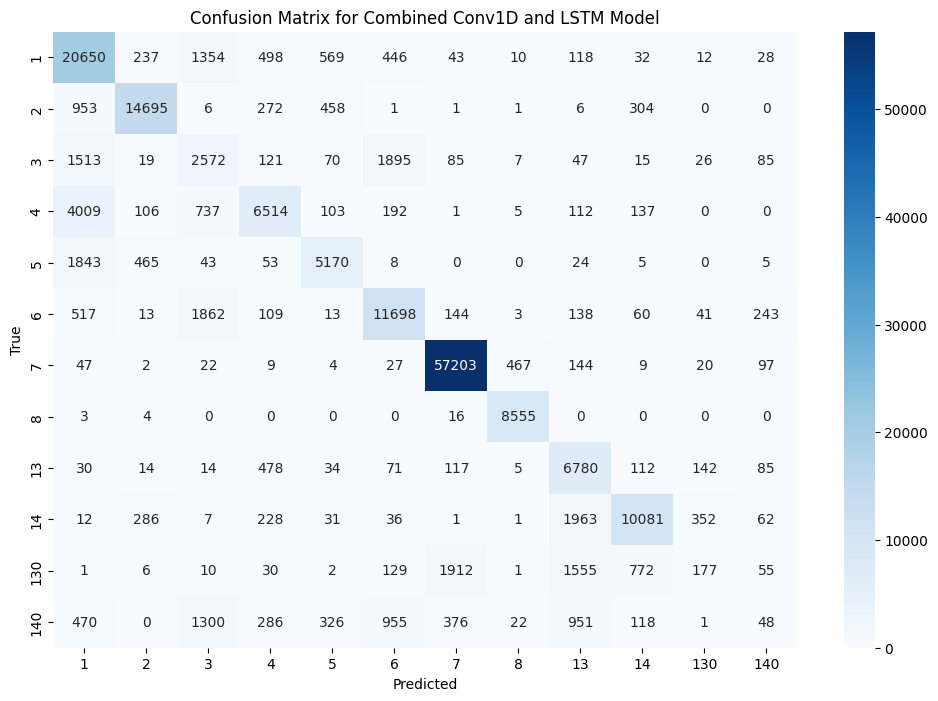

Model: "sequential_87"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_86 (Conv1D)              │ (None, 48, 64)         │         1,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_86 (MaxPooling1D) │ (None, 24, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_87 (Conv1D)              │ (None, 22, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_87 (MaxPooling1D) │ (None, 11, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_86 (LSTM)                  │ (None, 11, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_151 (Dropout)           │ (None, 11, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_87 (LSTM)                  │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_152 (Dropout)           │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_43 (Flatten)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_152 (Dense)               │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_153 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_153 (Dense)               │ (None, 141)            │        18,189 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 404,585 (1.54 MB)

 Trainable params: 134,861 (526.80 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 269,724 (1.03 MB)

In [ ]:
print(f'Overall Accuracy: {np.mean(accuracies_combined):.4f}')
print(f'Overall Recall: {np.mean(recalls_combined):.4f}')
print(f'Overall F1 Score: {np.mean(f1_scores_combined):.4f}')

# Plot confusion matrix
conf_matrix = confusion_matrix(all_y_true_combined, all_y_pred_combined)
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_balanced), yticklabels=np.unique(y_balanced))
plt.title('Confusion Matrix for Combined Conv1D and LSTM Model')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
# Plot model architecture
model.summary()

In the overall performence we see that the automatique feature extrcation models perform better then the handcrafted feature extrcation baseline model  mlp

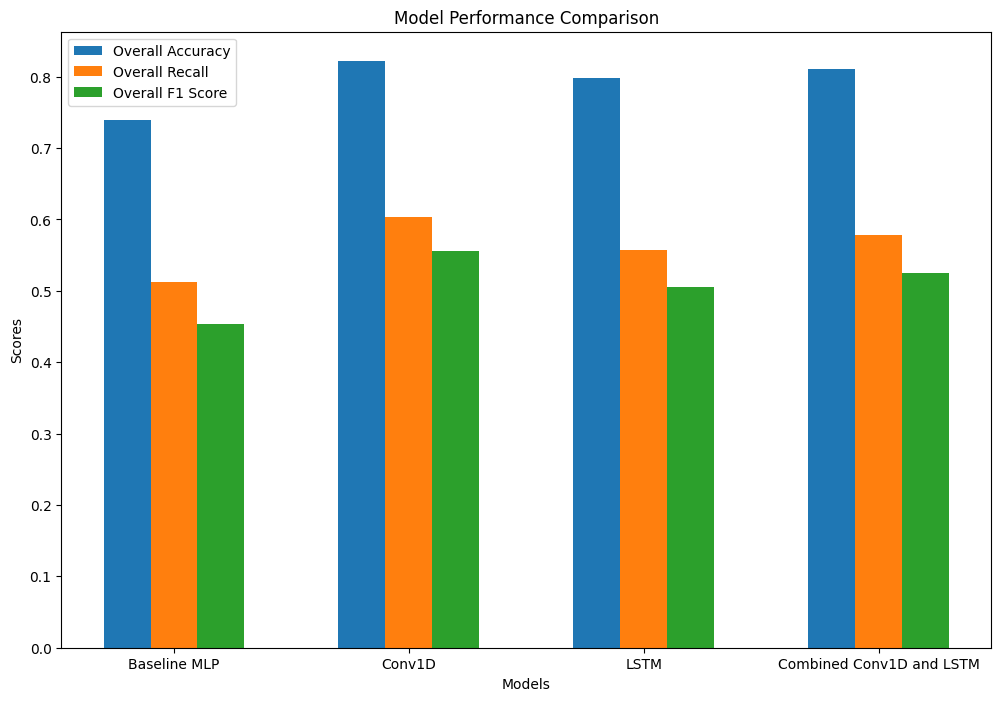

In [1]:
# I just enter this result manuly after i finish training to save time the  preprocceing and training take alot of time
import matplotlib.pyplot as plt
import numpy as np

# Define the data
models = ["Baseline MLP", "Conv1D", "LSTM", "Combined Conv1D and LSTM"]
overall_accuracy = [0.7391, 0.8219, 0.7975, 0.8106]
overall_recall = [0.5127, 0.6041, 0.5578, 0.5780]
overall_f1_score = [0.4542, 0.5557, 0.5056, 0.5249]

x = np.arange(len(models))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 8))
rects1 = ax.bar(x - width, overall_accuracy, width, label='Overall Accuracy')
rects2 = ax.bar(x, overall_recall, width, label='Overall Recall')
rects3 = ax.bar(x + width, overall_f1_score, width, label='Overall F1 Score')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

Poroject created by anass nassiri for domotics exam

Final Remarks
I enjoy work on this project I learned a lot.  But I faced a lot of problems and difficulties because the dataset Too large and computation environments I have is not suitable for big projects and large dataset. I trued my best to manage the situation. I kept switching between the platform Kaggle and google colab.
Future work and improvement.
With a powerful environment we can use advanced model and method and techniques. also perform a better balancing for the data set also more complex preprocceing.
